In [15]:
# This cell shows how I created the file to include only monthly data
# It is for reference as it uses advanced topics: pivot tables and refactoring
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("sales_data.csv", parse_dates=['Date'])

# Process Data So it is Suitable for a line plot
# Create a Pivot table Type are columns, Date is rows, Data is summed by date
pt= pd.pivot_table(df, values=['Sales'], columns=['Category'], index=['Date'], aggfunc=np.sum)

# Hard to see trends by date so aggregate by month
pt_Months = pt.resample(rule='M').sum()["Sales"]
print(pt_Months)

pt_Months.to_csv("monthly_sales_data.csv")

Category     Clothing  Cosmetics      Shoes
Date                                       
2022-01-31  694685.20   41961.12  438124.10
2022-02-28  632268.56   33788.46  423119.85
2022-03-31  699186.40   45457.88  380507.78
2022-04-30  655374.72   38992.94  423720.02
2022-05-31  697085.84   44400.72  421319.34
2022-06-30  704587.84   44644.68  357101.15
2022-07-31  757101.84   43790.82  449527.33
2022-08-31  819818.56   49035.96  401513.73
2022-09-30  735196.00   46108.44  412916.96
2022-10-31  778707.60   42571.02  436323.59
2022-11-30  772105.84   40700.66  550355.89
2022-12-31  752300.56   44400.72  405714.92


In [16]:
import pandas as pd

# Create a DataFrame from the monthly_sales_data csv file
# Ask it to convert all of the dates in the file from strings to dates
df = pd.read_csv("monthly_sales_data.csv", parse_dates=['Date'], index_col=["Date"])

display(df.head())

,Clothing,Cosmetics,Shoes
Date,,,
2022-01-31,694685.20,41961.12,438124.10
2022-02-28,632268.56,33788.46,423119.85
2022-03-31,699186.40,45457.88,380507.78
2022-04-30,655374.72,38992.94,423720.02
2022-05-31,697085.84,44400.72,421319.34


<AxesSubplot:xlabel='Date'>

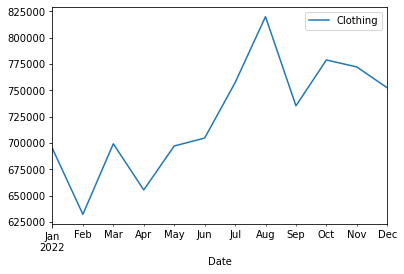

In [17]:
# Create a line plot for one of the columns in the table above
df.plot(y="Clothing")

<AxesSubplot:xlabel='Date'>

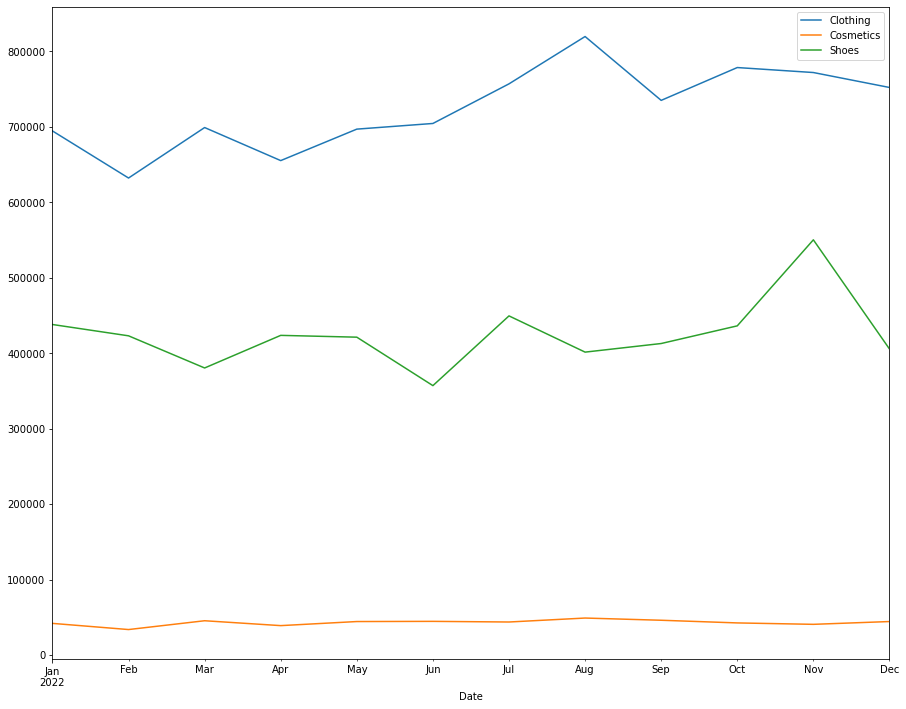

In [18]:
# Create a line plot for all of the columns in the table above
df.plot(figsize=(15,12))

<AxesSubplot:title={'center':'2022 Sales'}, xlabel='Date', ylabel='USD'>

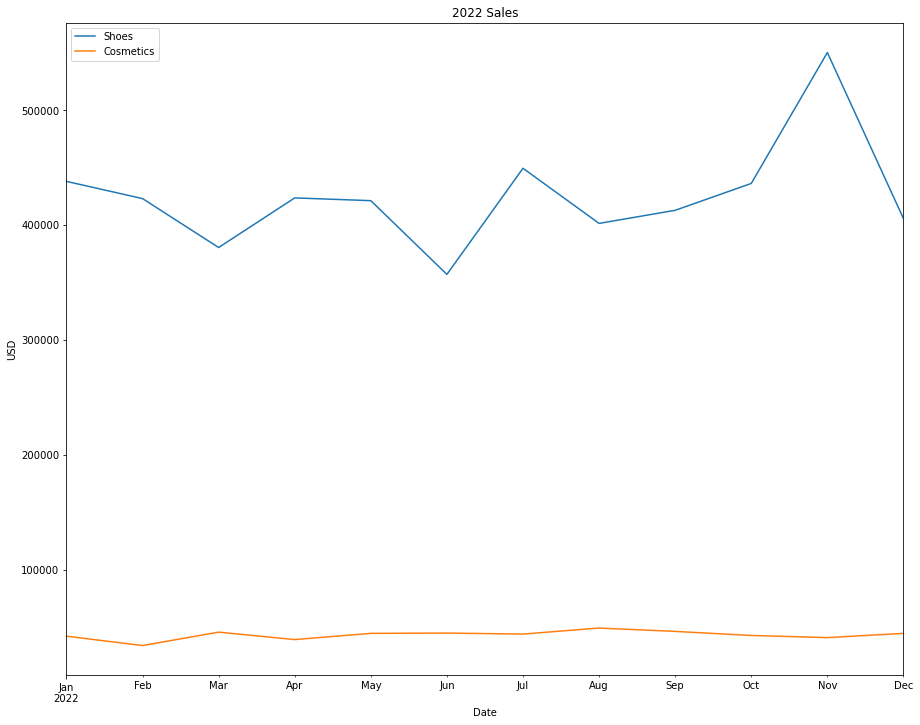

In [20]:
#We can use the other parameters provided by the plot() method to add more details to a plot
df.plot(y=["Shoes", "Cosmetics"], figsize=(15,12), 
        title='2022 Sales', ylabel='USD')